# OES data read test

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
import gzip


In [ ]:
a= np.fromfile('OES_data_set/2018-09-07_08h38m49s', dtype='int32')
a = np.reshape(a, (3650,3648))
a.shape

a[:,931]


In [ ]:
a.shape

In [ ]:
b = a
a = np.concatenate([a,b], axis = 0)
a = np.concatenate([a,b], axis = 0)
a.shape

In [ ]:
a[0][3649][3647]

In [ ]:
plt.imshow(a[0], cmap='Greys_r')
plt.savefig('result')
a_max = np.amax(a)
a_min = np.amin(a)

print(a_max, a_min)

b = (a - a_min)/(a_max-a_min)*255

In [ ]:
n = 5
l = 27
#plt.plot(a[(l-1)*128 : l*128,931-n : 931 +n])
#plt.show()

res_0_1 =  a[l*128 : (l+1)*128,0 : 834 -n]
pick_1 = a[l*128 : (l+1)*128,834-n : 834 +n]
res_1_2 =  a[l*128 : (l+1)*128,834 +n : 931-n]
pick_2 = a[l*128 : (l+1)*128,931-n : 931 +n]
res_2_3 =  a[l*128 : (l+1)*128,931 +n : 1083-n]
pick_3 = a[l*128 : (l+1)*128,1083-n : 1083 +n]
res_3_4 =  a[l*128 : (l+1)*128,1083 +n : 1500-n]
pick_4 = a[l*128 : (l+1)*128,1500-n : 1500 +n]
res_4_5 =  a[l*128 : (l+1)*128,1500 +n : 2220-n]
pick_5 = a[l*128 : (l+1)*128,2220-n : 2220 +n]
res_5_6 =  a[l*128 : (l+1)*128,2220 +n: 3600]
#plt.imshow(a[l*128 : (l+1)*128,931-n : 931 +n], cmap='Greys_r')
#plt.show()

In [ ]:
print(res_0_1.shape)
print(pick_1.shape)
print(res_1_2.shape)
print(pick_2.shape)
print(res_2_3.shape)
print(pick_3.shape)
print(res_3_4.shape)
print(pick_4.shape)
print(res_4_5.shape)
print(pick_5.shape)
print(res_5_6.shape)


In [ ]:
total = res_0_1.shape[1] +res_1_2.shape[1] +res_2_3.shape[1] +res_3_4.shape[1] +res_4_5.shape[1] +res_5_6.shape[1]





In [ ]:
print(res_0_1.shape[1]/total*(128-2*n*5))
print(res_1_2.shape[1]/total*(128-2*n*5))
print(res_2_3.shape[1]/total*(128-2*n*5))
print(res_3_4.shape[1]/total*(128-2*n*5))
print(res_4_5.shape[1]/total*(128-2*n*5))
print(res_5_6.shape[1]/total*(128-2*n*5))

res_0_1.shape[1]/total*(128-2*n*5) + res_1_2.shape[1]/total*(128-2*n*5) + res_2_3.shape[1]/total*(128-2*n*5) + res_3_4.shape[1]/total*(128-2*n*5) + res_4_5.shape[1]/total*(128-2*n*5) + res_5_6.shape[1]/total*(128-2*n*5)

In [ ]:
n = 12
l = 27
size = 128

pick_1 = a[l*size : (l+1)*size,834-n : 834 +n+1]

pick_2 = a[l*size : (l+1)*size,931-n : 931 +n+1]

pick_3 = a[l*size : (l+1)*size,1083-n : 1083 +n+1]

pick_4 = a[l*size : (l+1)*size,1500-n : 1500 +n+1]

pick_5 = a[l*size : (l+1)*size,2220-n : 2220 +n+1]


print(pick_1.shape)
print(pick_2.shape)
print(pick_3.shape)
print(pick_4.shape)
print(pick_5.shape)


In [ ]:
b = np.concatenate((pick_1,pick_2,pick_3,pick_4,pick_5),axis = 1)
b.shape

In [ ]:
plt.imshow(b, cmap='Greys_r')

In [ ]:
32*5

In [1]:


import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import pickle
import gzip
import os
file_dir = 'normal/'

#log_txt = open(file_dir +'normal_list.txt','w')
j = 0

total_max = 44967 
total_min = 7564

n = 12

size = 128

normal_data = []

sess = tf.Session(config=tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))) 
sess.run(tf.global_variables_initializer())
           

for i in os.listdir(file_dir):

                
    print(j, i)
    a= np.fromfile(file_dir +  i, dtype='int32')
    #a = (a - total_min)/(total_max - total_min)
    a = np.reshape(a, (3650,3648,1))
    
    j = j + 1
    for l in range(3600//size) : 
        
        
        
        pick_1 = a[l*size : (l+1)*size,834-n : 834 +n+1]

        pick_2 = a[l*size : (l+1)*size,931-n : 931 +n+1]

        pick_3 = a[l*size : (l+1)*size,1083-n : 1083 +n+1]

        pick_4 = a[l*size : (l+1)*size,1500-n : 1500 +n+1]

        pick_5 = a[l*size : (l+1)*size,2220-n : 2220 +n+1]
        b = np.concatenate((pick_1,pick_2,pick_3,pick_4,pick_5),axis = 1)
        normal_data.append(tf.image.resize_images(b,[128,128]).eval(session = sess)    )
        #print(l)




0 2018-09-07_09h51m42s_9


In [2]:
c = np.array(normal_data)
c.shape

(28, 128, 128, 1)

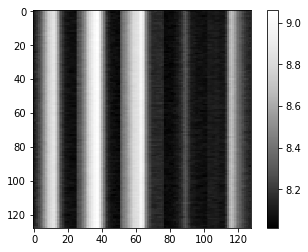

In [30]:
plt.imshow(np.resize(np.log(c[3]),(128,128)), cmap='Greys_r')
plt.colorbar()

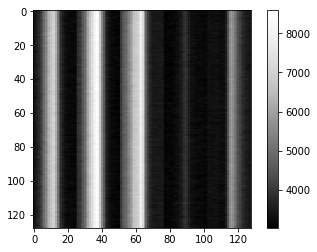

In [6]:
plt.imshow(np.resize(c[3],(128,128)), cmap='Greys_r')
plt.colorbar()

In [ ]:
#plt.imshow(np.resize(normal_data[27],(128,128)), cmap='Greys_r')

with gzip.open(file_dir + 'normal_data.pickle.gzip','wb') as f :
    pickle.dump(c,f)



In [31]:
dir_file = 'normal/'
with gzip.open(dir_file  + 'normal_data.pickle.gzip','rb') as f :
    normal_data = pickle.load(f)
        

In [32]:
normal_data.shape

(11144, 128, 128, 1)

In [ ]:
normal_data.shape[0]

In [34]:


import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import pickle
import gzip
import os
file_dir = 'anomaly/'

a = np.zeros((3650,3648))
#log_txt = open(file_dir +'normal_list.txt','w')
j = 0



n = 12

size = 128

anomaly_data = []

sess = tf.Session(config=tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))) 
sess.run(tf.global_variables_initializer())
           

for i in os.listdir(file_dir):

    #if j > 0 :
     #   break
        
        
    print(j, i)
    a= np.fromfile(file_dir +  i, dtype='int32')
    #a = (a - total_min)/(total_max - total_min)
    a = np.reshape(a, (3650,3648,1))
    
    j = j + 1
    for l in range(3600//size) : 
        
        pick_1 = a[l*size : (l+1)*size,834-n : 834 +n+1]

        pick_2 = a[l*size : (l+1)*size,931-n : 931 +n+1]

        pick_3 = a[l*size : (l+1)*size,1083-n : 1083 +n+1]

        pick_4 = a[l*size : (l+1)*size,1500-n : 1500 +n+1]

        pick_5 = a[l*size : (l+1)*size,2220-n : 2220 +n+1]
        b = np.concatenate((pick_1,pick_2,pick_3,pick_4,pick_5),axis = 1)
        anomaly_data.append(tf.image.resize_images(b,[128,128]).eval(session = sess)    )
        print(l)





0 2018-10-28_18h36m36s
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
1 2018-10-28_15h03m55s
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
2 2018-10-28_18h06m32s
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
3 2018-10-28_16h52m32s
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
4 2018-10-28_18h49m57s
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
5 2018-10-28_16h36m38s
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
6 2018-10-28_15h21m26s
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
7 2018-10-28_16h04m58s
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
8 2018-10-28_16h19m56s
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
9 2018-10-28_17h25m53s
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
10 2018-10-28_19h15m48s
0
1
2


In [35]:
c = np.array(anomaly_data)
c.shape

(560, 128, 128, 1)

In [36]:
with gzip.open(file_dir + 'anomaly_data.pickle.gzip','wb') as f :
    pickle.dump(c,f)



In [ ]:
dir_file = 'normal/'
with gzip.open(dir_file  + 'normal_data.pickle.gzip','rb') as f :
    normal_data = np.array(pickle.load(f))

In [ ]:
plt.imshow(np.resize(normal_data[1127],(128,128)), cmap='Greys_r')



In [ ]:
dir_file = 'anomaly/'
with gzip.open(dir_file  + 'anomaly_data.pickle.gzip','rb') as f :
    anomaly_data = np.array(pickle.load(f))

In [ ]:
plt.imshow(np.resize(anomaly_data[1],(128,128)), cmap='Greys_r')
plt.colorbar()

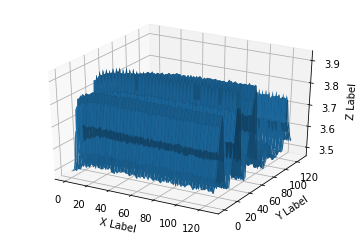

In [29]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D # This import has side effects required for the kwarg projection='3d' in the call to fig.add_subplot
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y= np.arange(0, 128)
X, Y = np.meshgrid(x, y)
zs = np.array([np.log10(c[0,x,y]) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()